## Load Data and Perform EDA

In [1]:
import pandas as pd
import numpy as np

We import the dataset, which comes with semicolons instead of
commas; hence, we mention the separators as semicolons.

In [2]:
student_data = pd.read_csv('student-por.csv', sep=';')

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
len(student_data)

649

In [5]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [6]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


## Data Preprocessing

Next we add columns for pass and fail. The data in these columns would contain 1 or 0,
where 1 means pass and 0 means fail

In [8]:
student_data['P/F'] = student_data.apply(lambda x: 1 if (x['G1'] + x['G2'] + x['G3']) >= 35 else 0, axis = 1)

In [9]:
student_data = student_data.drop(['G1', 'G2', 'G3'], axis=1)

In [10]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,P/F
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [11]:
student_data = pd.get_dummies(student_data, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                                                      'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                                                      'nursery', 'higher', 'internet', 'romantic'])

In [12]:
student_data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [13]:
student_data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'P/F',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

## Splitting Data

Now, we need to shuffle the rows and produce a training set with first 500 rows and rest 149
rows for test set and then we just need to get attributes form the training set which means
we will get rid of the pass column and save the pass column separately. The same is
repeated for the testing set.

In [14]:
student_data = student_data.sample(frac=1)

train_set = student_data[:500]
test_set = student_data[500:]

train_set_features = train_set.drop('P/F', axis = 1)
train_set_labels = train_set['P/F'].copy()

test_set_features = test_set.drop('P/F', axis = 1)
test_set_labels = test_set['P/F'].copy()

Number of Passing Students in whole Dataset:

In [15]:
print('%d out of %d (%.2f%%)' % (sum(student_data['P/F']),
                                 len(student_data['P/F']),
                                 100 * float(sum(student_data['P/F'])/len(student_data['P/F']))))

328 out of 649 (50.54%)


This being the Pass percentage which is roughly around 50% of the dataset. This
constitutes a well-balanced dataset.

## Build the Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

t = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)

t = t.fit(train_set_features, train_set_labels)

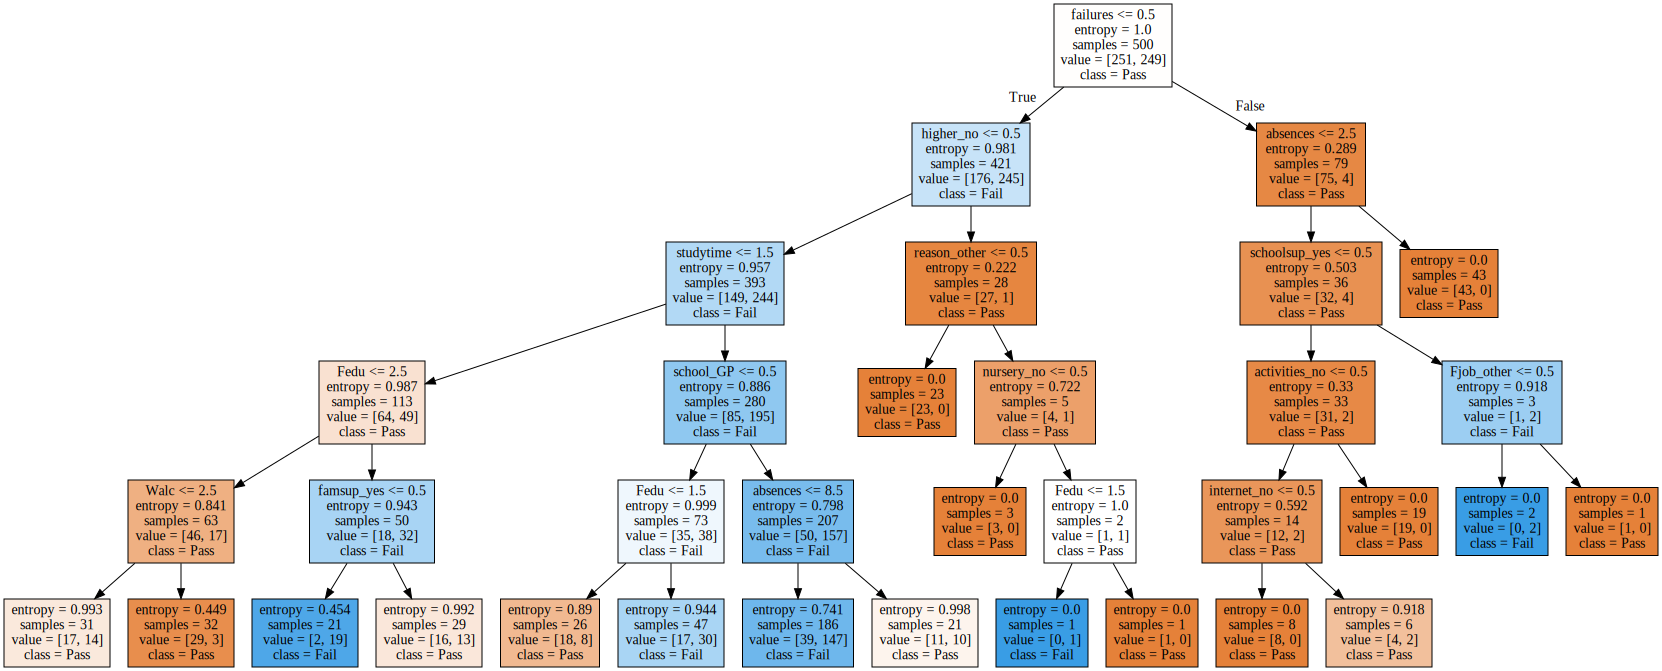

In [17]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(t, out_file = None, 
                                feature_names = list(train_set_features.columns),  
                                class_names = ['Pass', 'Fail'],
                                filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

## Evaluation

Next we check the score of the tree using the testing set that we created earlier:

In [18]:
t.score(test_set_features, test_set_labels)

0.6644295302013423

The result we had was approximately 70%. Now let's cross verify the result to be assured
that the dataset is trained perfectly:

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(t, student_data.drop('P/F', axis = 1), student_data['P/F'], cv = 5)

# Show Avg. Score +/- two Standard Deviations away constituting 95% of Scores

print('Accuracy: %.2f (+/- %.2f)' % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.06)


Performing cross-validation on the entire dataset, splits the data on a 
20/80 basis, where 20% is the on testing set and 80% is on the training set. The average
result is 67%. This shows that we have a well-balanced dataset. Here we have various
choices to make regarding **max_depth**.

In [20]:
for max_depth in range(1, 20):
    
    t = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    
    scores = cross_val_score(t, student_data.drop('P/F', axis = 1), student_data['P/F'], cv = 5)
    
    print('Max Depth: %d, Accuracy: %.2f (+/- %.2f)' % (max_depth, scores.mean(), scores.std() * 2))

Max Depth: 1, Accuracy: 0.64 (+/- 0.06)
Max Depth: 2, Accuracy: 0.67 (+/- 0.01)
Max Depth: 3, Accuracy: 0.69 (+/- 0.03)
Max Depth: 4, Accuracy: 0.69 (+/- 0.06)
Max Depth: 5, Accuracy: 0.66 (+/- 0.06)
Max Depth: 6, Accuracy: 0.67 (+/- 0.08)
Max Depth: 7, Accuracy: 0.63 (+/- 0.05)
Max Depth: 8, Accuracy: 0.65 (+/- 0.04)
Max Depth: 9, Accuracy: 0.65 (+/- 0.04)
Max Depth: 10, Accuracy: 0.65 (+/- 0.03)
Max Depth: 11, Accuracy: 0.65 (+/- 0.05)
Max Depth: 12, Accuracy: 0.67 (+/- 0.04)
Max Depth: 13, Accuracy: 0.65 (+/- 0.06)
Max Depth: 14, Accuracy: 0.65 (+/- 0.07)
Max Depth: 15, Accuracy: 0.64 (+/- 0.06)
Max Depth: 16, Accuracy: 0.64 (+/- 0.06)
Max Depth: 17, Accuracy: 0.65 (+/- 0.06)
Max Depth: 18, Accuracy: 0.64 (+/- 0.09)
Max Depth: 19, Accuracy: 0.65 (+/- 0.05)


In [21]:
d = np.empty((19, 3), float)

i = 0

for max_depth in range(1, 20):
    
    t = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    
    scores = cross_val_score(t, student_data.drop('P/F', axis = 1), student_data['P/F'], cv = 5)
    
    d[i, 0] = max_depth
    
    d[i, 1] = scores.mean()
    
    d[i, 2] = scores.std() * 2
    
    i = i + 1
    
d

array([[1.00000000e+00, 6.37865236e-01, 5.69213166e-02],
       [2.00000000e+00, 6.65629100e-01, 8.97695579e-03],
       [3.00000000e+00, 6.90244484e-01, 3.47333507e-02],
       [4.00000000e+00, 6.87167561e-01, 6.06132179e-02],
       [5.00000000e+00, 6.65605247e-01, 5.88473055e-02],
       [6.00000000e+00, 6.68646392e-01, 8.44539902e-02],
       [7.00000000e+00, 6.50196780e-01, 3.84588592e-02],
       [8.00000000e+00, 6.44042934e-01, 3.24540986e-02],
       [9.00000000e+00, 6.42504472e-01, 3.67312068e-02],
       [1.00000000e+01, 6.39379845e-01, 5.10816681e-02],
       [1.10000000e+01, 6.47107931e-01, 4.83314168e-02],
       [1.20000000e+01, 6.45521765e-01, 5.99356570e-02],
       [1.30000000e+01, 6.62516398e-01, 3.96660488e-02],
       [1.40000000e+01, 6.56362552e-01, 3.83413709e-02],
       [1.50000000e+01, 6.42420990e-01, 9.40045970e-02],
       [1.60000000e+01, 6.50161002e-01, 4.65383713e-02],
       [1.70000000e+01, 6.25485987e-01, 7.40304004e-02],
       [1.80000000e+01, 6.45533

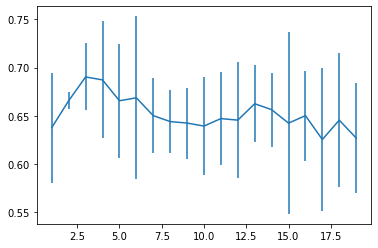

<Figure size 1440x1440 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(d[:, 0], d[:, 1], yerr = d[:, 2])
plt.figure(figsize=(20, 20))
plt.show()

The **Error Bars** shown in the following screenshot are the Standard Deviations in the Score,
which concludes that a depth of 3 or 4 is ideal for this dataset, and that our assumption of 5
was incorrect: More depth doesn't give any more power.